In [487]:
import pandas as pd
import numpy as np
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [433]:
# loading our tips dataset using the data from pydataset

tip_df = data('tips')


# getting information about the dataset

tip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [434]:
# taking a look at the data

tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


**Takeaways**
- we have some non numeric data types for categorical variables which can be converted to numeric 
- we might have to scale our data so that each variable have equal contribution to our model


In [435]:
# encoding categorical to numeric data types


tips = pd.concat([tip_df, (pd.get_dummies(tip_df[['sex', 'smoker', 'time']], drop_first = True))], axis = 1)

In [436]:
# dropping the repeated columns


tips = tips.drop(columns = ['sex', 'smoker', 'time'])

In [437]:
tips

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
1,16.99,1.01,Sun,2,0,0,0
2,10.34,1.66,Sun,3,1,0,0
3,21.01,3.50,Sun,3,1,0,0
4,23.68,3.31,Sun,2,1,0,0
5,24.59,3.61,Sun,4,0,0,0
...,...,...,...,...,...,...,...
240,29.03,5.92,Sat,3,1,0,0
241,27.18,2.00,Sat,2,0,1,0
242,22.67,2.00,Sat,2,1,1,0
243,17.82,1.75,Sat,2,1,0,0


- Create a column named tip_percentage. This should be the tip amount divided by the total bill.

In [438]:
tips['tip_percentage'] = tips.tip/tips.total_bill


- Create a column named price_per_person. This should be the total bill divided by the party size.

In [439]:
tips['price_per_person'] = tips['total_bill']/tips['size']


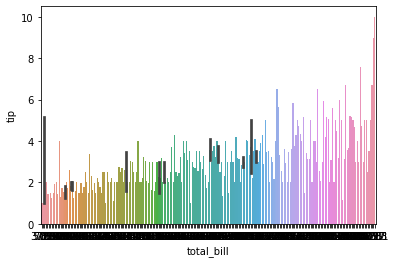

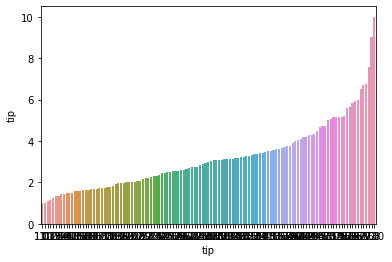

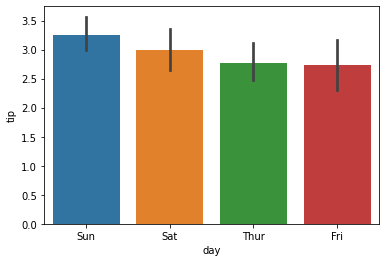

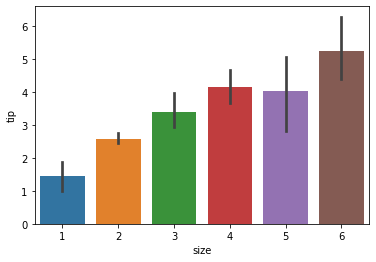

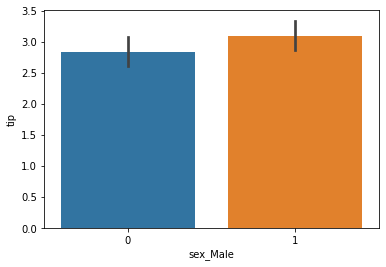

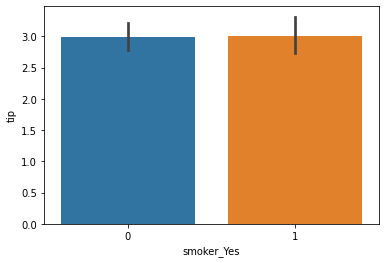

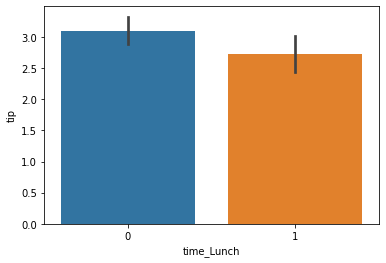

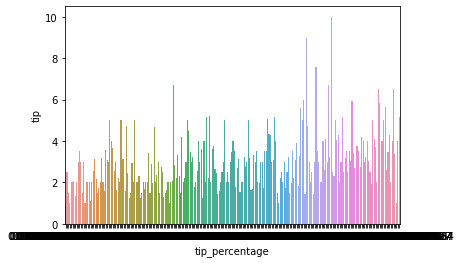

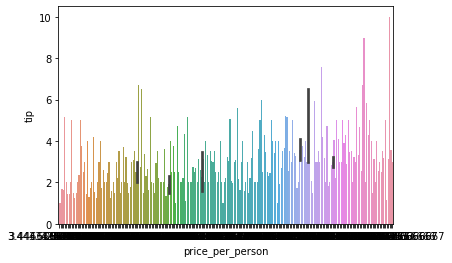

In [440]:
for col in tips.columns:
    sns.barplot(data = tips, x = tips[col], y = tips.tip)
    plt.show()

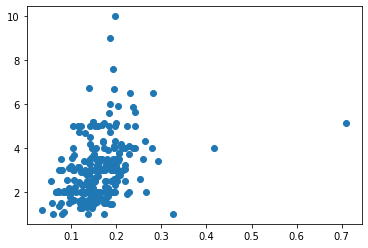

In [441]:
plt.scatter(tips.tip_percentage, tips.tip)

- Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

    - Features such as the day, size, time are most important in predicting the tip amount.

In [442]:
 tips = pd.concat([tips ,pd.get_dummies(tips.day)], axis = 1)

In [443]:
tips = tips.drop(columns = 'day')

In [444]:
tips

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,tip_percentage,price_per_person,Fri,Sat,Sun,Thur
1,16.99,1.01,2,0,0,0,0.059447,8.495000,0,0,1,0
2,10.34,1.66,3,1,0,0,0.160542,3.446667,0,0,1,0
3,21.01,3.50,3,1,0,0,0.166587,7.003333,0,0,1,0
4,23.68,3.31,2,1,0,0,0.139780,11.840000,0,0,1,0
5,24.59,3.61,4,0,0,0,0.146808,6.147500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,3,1,0,0,0.203927,9.676667,0,1,0,0
241,27.18,2.00,2,0,1,0,0.073584,13.590000,0,1,0,0
242,22.67,2.00,2,1,1,0,0.088222,11.335000,0,1,0,0
243,17.82,1.75,2,1,0,0,0.098204,8.910000,0,1,0,0


In [445]:
# lets split our data

train_validate, test = train_test_split(tips, test_size = .15, random_state = 123)


train, validate = train_test_split(train_validate, test_size = 0.15, random_state = 123)

# checking the shape of the splitted data
train.shape, test.shape, validate.shape

((175, 12), (37, 12), (32, 12))

In [446]:
train

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,tip_percentage,price_per_person,Fri,Sat,Sun,Thur
241,27.18,2.00,2,0,1,0,0.073584,13.590000,0,1,0,0
69,20.23,2.01,2,1,0,0,0.099357,10.115000,0,1,0,0
187,20.90,3.50,3,0,1,0,0.167464,6.966667,0,0,1,0
240,29.03,5.92,3,1,0,0,0.203927,9.676667,0,1,0,0
175,16.82,4.00,2,1,1,0,0.237812,8.410000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,19.81,4.19,2,0,1,1,0.211509,9.905000,0,0,0,1
138,14.15,2.00,2,0,0,1,0.141343,7.075000,0,0,0,1
178,14.48,2.00,2,1,1,0,0.138122,7.240000,0,0,1,0
19,16.97,3.50,3,0,0,0,0.206246,5.656667,0,0,1,0


In [447]:
# next, we are scaling our data, but first lets create our scaler object

scaler = MinMaxScaler()

In [448]:
# but before we scale our data lets differentiate our X and y variable because we dont scale our dependent variable

x_train = train.drop(columns = 'tip')

y_train = train[['tip']]

In [449]:
# now we can scale the data

# lets fit our scaler to the data

scaler = scaler.fit(x_train)

In [450]:
# lets transform our data

x_train_scaled = scaler.transform(x_train)

In [451]:
# returning our scaled data as a nice dataframe

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns, index = x_train.index)

### using SelectKBest

In [452]:
# time to do some feature engineering


# lets create our selecter object

selector = SelectKBest(f_regression, k = 2)


# lets fit our selector object

selector = selector.fit(x_train_scaled, y_train.tip)



In [453]:
# gets the boolean values true for the columns that are selected and false for those that arent
# can use this to get our reduced dataframe
selector_support = selector.get_support()

In [454]:
# masking with our support to get the reduced dataframe

x_train_reduced = x_train_scaled.loc[:, selector_support]

In [455]:
x_train_reduced

,total_bill,size
241,0.532700,0.2
69,0.379143,0.2
187,0.393946,0.4
240,0.573575,0.4
175,0.303800,0.2
...,...,...
192,0.369863,0.2
138,0.244808,0.2
178,0.252099,0.2
19,0.307114,0.4


### 2 features identified by the SelectKBest to predict the tip amount are : 
- total_bill
- size

### using RFE

In [456]:
# lets get our data first

x_train_scaled
y_train

,tip
241,2.00
69,2.01
187,3.50
240,5.92
175,4.00
...,...
192,4.19
138,2.00
178,2.00
19,3.50


In [457]:
# lets create an RFE object but for RFE we have to first create our linear regression object so, 

lm = LinearRegression()


In [458]:
# now lets create our rfe
rfe = RFE(lm, 2)

In [459]:
# lets fit our rfe

rfe = rfe.fit(x_train_scaled, y_train.tip)

In [460]:
# lets get our rfe support
rfe_support = rfe.support_

rfe_support

array([ True, False, False, False, False,  True, False, False, False,
       False, False])

In [461]:
# lets get our transformed dataframe with only the number of features we had specified
x_train_reduced = x_train_scaled.loc[:, rfe_support]

In [462]:
# lets take a look at our reduced dataframe

x_train_reduced

,total_bill,tip_percentage
241,0.532700,0.056240
69,0.379143,0.094440
187,0.393946,0.195383
240,0.573575,0.249425
175,0.303800,0.299647
...,...,...
192,0.369863,0.260663
138,0.244808,0.156668
178,0.252099,0.151893
19,0.307114,0.252863


### 2 features identified by the RFE to predict the tip amount are : 
- total_bill
- tip_percentage

## Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [463]:
# getting our dependent and independent variables separated


x_train = train.drop(columns = 'tip_percentage')


y_train = train[['tip_percentage']]

In [464]:
# now we will have to rescale the data because our predictor variables and our target variables have changed

# create scaler object

scaler = MinMaxScaler()

In [465]:
# fit scaler
scaler = scaler.fit(x_train)


In [466]:
# transform the dataframe using the scaler object

x_train_scaled = scaler.transform(x_train)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns, index = x_train.index)

In [467]:
# lets take a look at our scaled dataframe

x_train_scaled.head()

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,price_per_person,Fri,Sat,Sun,Thur
241,0.532700,0.12500,0.2,0.0,1.0,0.0,0.615805,0.0,1.0,0.0,0.0
69,0.379143,0.12625,0.2,1.0,0.0,0.0,0.416092,0.0,1.0,0.0,0.0
187,0.393946,0.31250,0.4,0.0,1.0,0.0,0.235153,0.0,0.0,1.0,0.0
240,0.573575,0.61500,0.4,1.0,0.0,0.0,0.390900,0.0,1.0,0.0,0.0
175,0.303800,0.37500,0.2,1.0,1.0,0.0,0.318103,0.0,0.0,1.0,0.0


In [468]:
# now lets do some feature engineering using SelectKBest

selector = SelectKBest(f_regression, k = 2)

In [469]:
# lets fit our selector

selector = selector.fit(x_train_scaled, y_train.tip_percentage) # y_train.tip_percentage because this method accepts an array

In [470]:
# lets get our support

selector_support = selector.get_support()

In [471]:
# check support

selector_support

array([ True,  True, False, False, False, False, False, False, False,
       False, False])

In [472]:
# use support as mask to get desired dataframe with just the number of columns we had previously specified

x_train_reduced = x_train_scaled.loc[:, selector_support]

In [473]:
# lets take a look into our dataframe

x_train_reduced

,total_bill,tip
241,0.532700,0.12500
69,0.379143,0.12625
187,0.393946,0.31250
240,0.573575,0.61500
175,0.303800,0.37500
...,...,...
192,0.369863,0.39875
138,0.244808,0.12500
178,0.252099,0.12500
19,0.307114,0.31250


### 2 features identified by the SelectKBest to predict the tip percentage are : 
- total_bill
- tip

## Using RFE

In [474]:
# getting our dependent and independent variables

x_train_scaled


y_train

,tip_percentage
241,0.073584
69,0.099357
187,0.167464
240,0.203927
175,0.237812
...,...
192,0.211509
138,0.141343
178,0.138122
19,0.206246


In [475]:
# we know that we will firt need a linear model to implement RFE

lm = LinearRegression()

In [476]:
# lets create oyr rfe object

rfe = RFE(lm, 2)

In [477]:
# lets fit our rfe object

rfe = rfe.fit(x_train_scaled, y_train.tip_percentage)

In [478]:
# lets check our rfe support

rfe_support = rfe.support_



### You can get your features and their ranks in a dataframe 

In [479]:

# we can also get the ranking of the variables using the following function

features_rank = rfe.ranking_



# getting the columns names

column_names = x_train_scaled.columns.tolist()


# creating a dictionary to later convert to data frame
data = {'rank': features_rank, 'features':column_names }


# dataframe with features and their rankings

features_ranking_df = pd.DataFrame.from_dict(data).sort_values(by = 'rank')

features_ranking_df

,rank,features
0,1,total_bill
1,1,tip
6,2,price_per_person
2,3,size
4,4,smoker_Yes
9,5,Sun
5,6,time_Lunch
10,7,Thur
8,8,Sat
7,9,Fri


In [480]:
# lets use the rfe_support as a boolean mask to get the dataframe with just the 2 features selected by our RFE object

x_train_reduced = x_train_scaled.loc[:, rfe_support]

x_train_reduced

,total_bill,tip
241,0.532700,0.12500
69,0.379143,0.12625
187,0.393946,0.31250
240,0.573575,0.61500
175,0.303800,0.37500
...,...,...
192,0.369863,0.39875
138,0.244808,0.12500
178,0.252099,0.12500
19,0.307114,0.31250


### 2 features identified by the RFE to predict the tip percentage are : 
- total_bill
- tip

**Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.**

In [481]:
# writing function for select k best

def select_kbest(X, y, n):
    '''takes in X_variables, y variables and the number of features to select and
    runs through the SelectKBest and return the list of top features'''
    
    f_selector = SelectKBest(f_regression, k = n)
    
    f_selector = f_selector.fit(X,y)
    
    f_support = f_selector.get_support()
    
    f_features = X.loc[:, f_support].columns.tolist()
    
    return f_features

In [482]:
# checking if our function works

select_kbest(x_train_scaled, y_train.tip_percentage, 2)

['total_bill', 'tip']

**Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.**

In [483]:
# creating our function

def rfe(X, y, n):
    '''takes in X_variables, y variables and the number of features to select and
    runs through the RFE and return the list of top features'''
    
    lm = LinearRegression()
    
    rfe = RFE(lm, n)
    
    rfe = rfe.fit(X, y)
    
    rfe_support = rfe.support_
    
    f_features = X.loc[:, rfe_support].columns.tolist()
    
    return f_features

In [484]:
# checking our function

rfe(x_train_scaled, y_train.tip_percentage, 2)

['total_bill', 'tip']

**Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).**

In [488]:
# loading our dataset

df = data('swiss')

In [489]:
# lets take a look at our data
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [490]:
# lets get some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


**Takeaways**
- No null values
- All numeric type

In [491]:
# lets split our data

train_validate, test = train_test_split(df, test_size = 0.1, random_state = 123)
train, validate = train_test_split(train_validate, test_size = 0.10, random_state = 123)
train.shape, test.shape, validate.shape

((37, 6), (5, 6), (5, 6))

In [492]:
# lets differentiate between X and y variables

X_train = train.drop(columns = 'Fertility')
y_train = train[['Fertility']]

In [493]:
# lets get the list of 3 best features using SelectKBest

features_kbest = select_kbest(X_train, y_train.Fertility, 3)

features_kbest

['Examination', 'Education', 'Infant.Mortality']

In [494]:
# lets get the list of 3 best features using RFE
features_rfe = rfe(X_train, y_train.Fertility, 3)
features_rfe

['Examination', 'Education', 'Infant.Mortality']